In [1]:
import numpy as np
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import statsmodels as sm
import itertools
import heapq
import pylab as pl

In [2]:
data = np.load('MTA_Fare.npy')
#data = np.delete(data,551)
#np.shape(data)

In [61]:
print ('The shape of my numpy array is')
print (np.shape(data))
#gives size as the first element,number of rows as second and number of columns as third element



The shape of my numpy array is
(600, 23, 194)


In [62]:
print 'lets print it out and see'
print (data)


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-62-a86ed168face>, line 1)

In [67]:
counter = 0
for x in np.nditer(data):
    if x==-1:
        #print x
        counter = counter+1
        
Total = np.size(data)   
missing = (counter/(Total*1.0))*100.0
print ('Total numebr of values', Total)
print ('The number and percentage of missing values',counter,missing)

Total numebr of values 2677200
The number and percentage of missing values 0 0.0


In [6]:
#As you can see the percentage of missing values is less, we can NAN them instead of performing imputation
data = np.where(data<0,'NaN',data)
data.shape
data = data.astype(float)

#Task 1:
###Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.Identify it and figure out what it is due to.

In [95]:
data_mean = np.nanmean(data)
weekly_mean = []
for i in range(194):
    weekly_mean.append(np.nanmean(data[:,:,i]))
    
print data_mean    

2849.41627865


In [96]:
weighted_weekly_average = weekly_mean/data_mean
weekly_mean.index(min(weekly_mean))

126

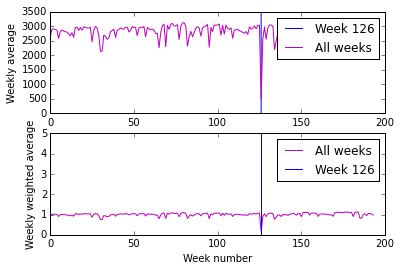

In [97]:
#PLOT Both 

#ax = plt.subplots()
ax1 = plt.subplot(2,1,1)
y = np.arange(0,3500)
#print len(x)
x = [weekly_mean.index(min(weekly_mean))]*len(y)
ax1.plot(x,y,'-',label = 'Week %i'%weekly_mean.index(min(weekly_mean)))
ax1.plot(range(194),weekly_mean,color = 'm',label='All weeks')
#ax.annotate('126th week')
ax1.set_ylabel('Weekly average')
ax1.set_xlabel('Week number')
ax1.legend()
#ax1.show()
ax2 = plt.subplot(2,1,2)


#PLotting for weighted average

y1 = np.arange(0,6)
x1 = [weekly_mean.index(min(weekly_mean))]*len(y1)
ax2.plot(range(194),weighted_weekly_average, color = 'm',label='All weeks')
ax2.plot(x1,y1,'-',label = 'Week %i'%weekly_mean.index(min(weekly_mean)))
#plt.show()
#ax.annotate('126th week')
ax2.set_ylabel('Weekly weighted average')
ax2.set_xlabel('Week number')
ax2.legend()
#ax1.show()


In [98]:
start_date = datetime.datetime.strptime('05/21/2010','%m/%d/%Y')
add_week = datetime.timedelta(weeks=126)
drop_date = start_date + add_week
print 'The date with the lowest drop,(So that we can know the week too)'
print drop_date

The date with the lowest drop,(So that we can know the week too)
2012-10-19 00:00:00


######Reason: Hurricane Sandy
This was the week during which Hurricane Sandy had hit New York City.The exact reported time according to 
######'New York Daily News' is 29th OCtober,2015. 
There is a visible drop as people were not commuting .

#Task 2:
###Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [ ]:
#Collecting the 
all_types = []
sum_typelist = []
sum_typelist1 = []
for j in range(0,23):
    sum_type = 0
    for k in range(194):
        for i in range(600):
            sum_typelist.append(data[i,j,k])
            #Moving in the 600 station loop,so that for a particular card type,and week,we collect its value for all stations
        
        sum_forRM = ma.sum(sum_typelist)
        sum_typelist1.append(sum_forRM)
        #Forming a list in a list,where each value of the outer list is the card type usage for 194 weeks
    
    all_types.append(pd.rolling_mean(pd.Series(sum_typelist1),window = 20))    
    #changing the card type , with each j

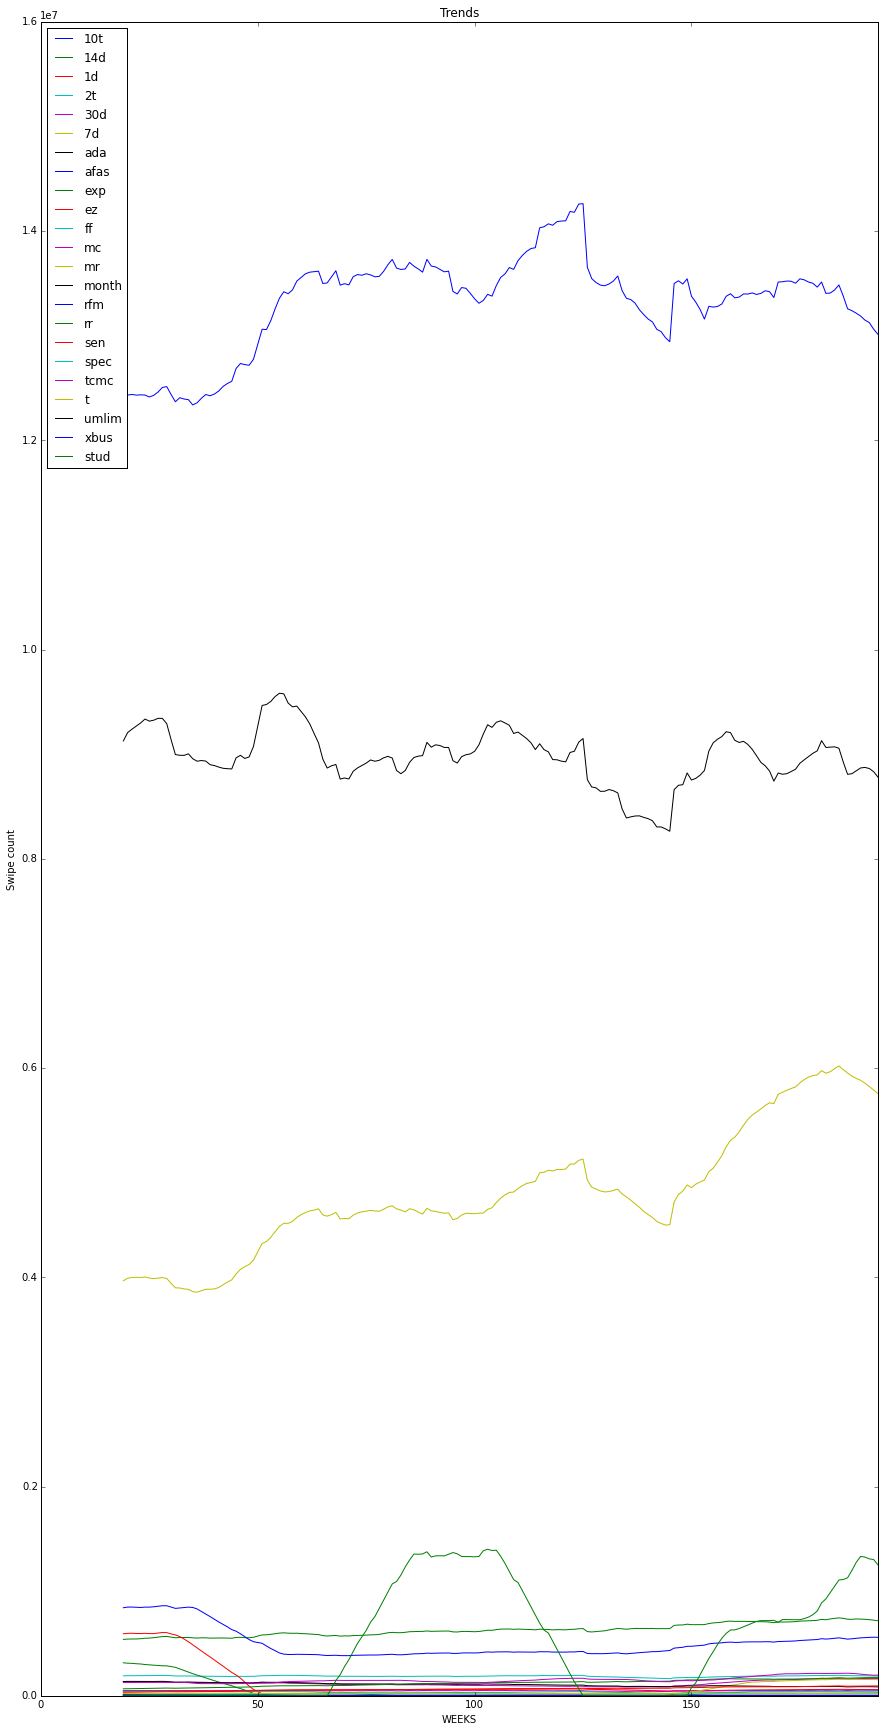

In [68]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
mta_stations = np.transpose(np.nansum(data, axis=0))
mta_stations = pd.DataFrame(mta_stations,columns=ridetype).dropna()
pd.rolling_mean((mta_stations),20).plot(figsize=(15,30))
pl.xlabel('WEEKS')
pl.ylabel('Swipe count')
pl.title('Trends')
rolling_mean = pd.rolling_mean((mta_stations),20)


In [39]:
rm = rolling_mean

increasing
mc
increasing
mr
increasing
rfm
increasing
rr
increasing
sen
increasing
spec
increasing
tcmc
increasing
xbus
increasing
stud


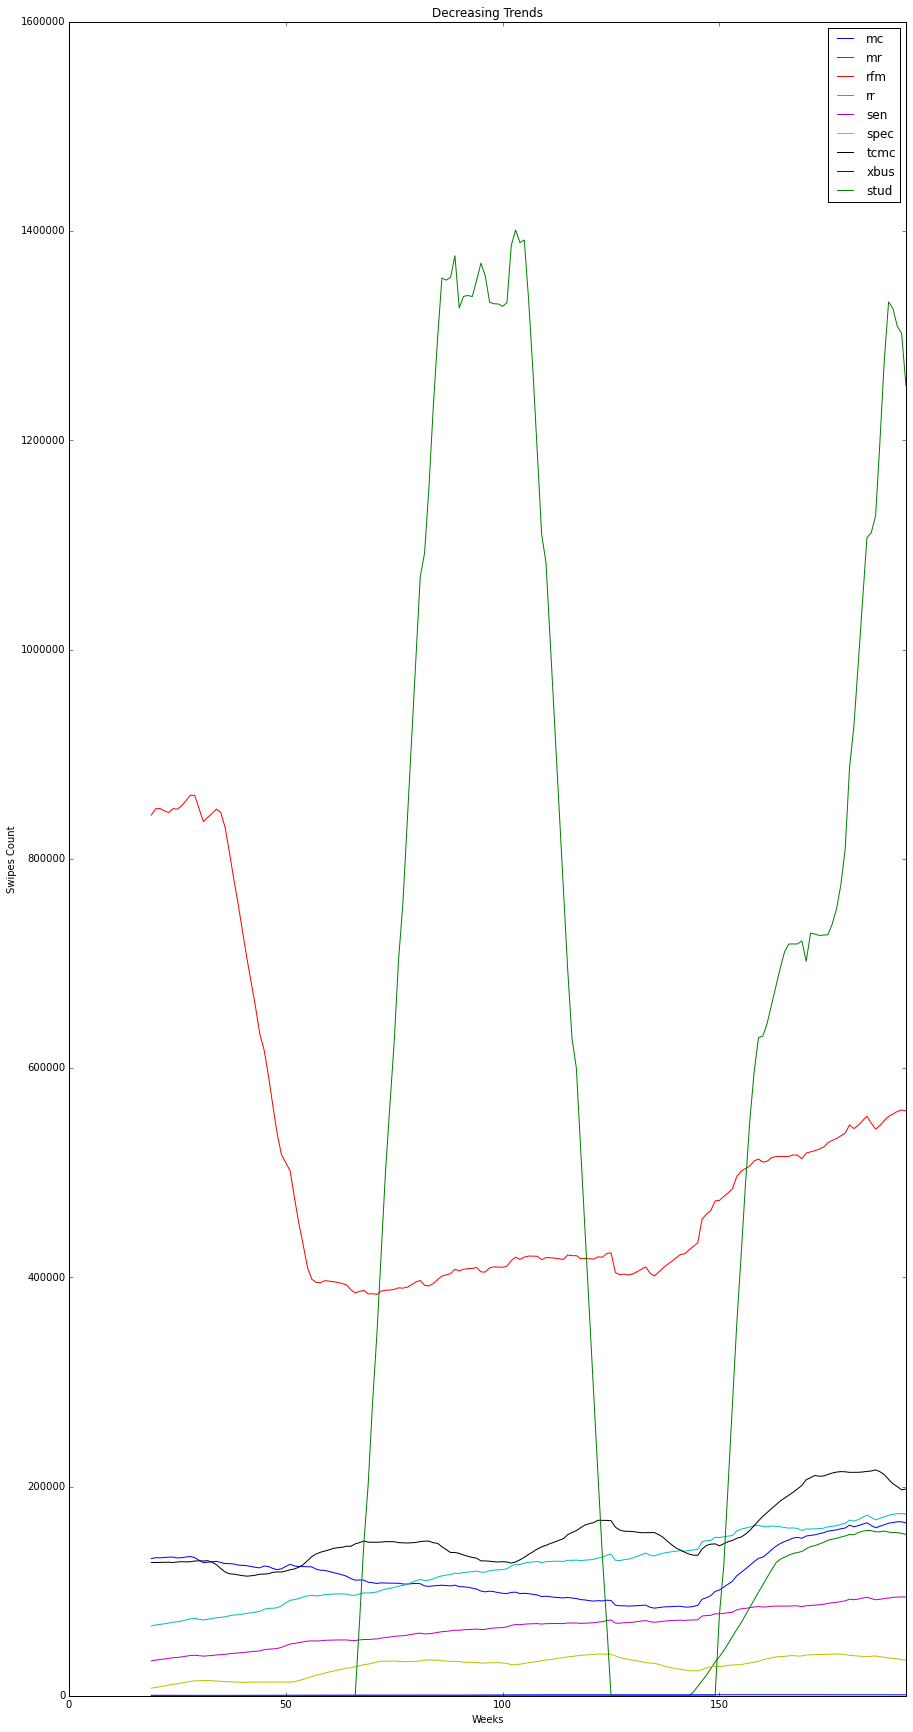

In [59]:
for i in ridetype:
    first10 = np.mean(rolling_mean[i][60:70])
    last10 = np.mean(rolling_mean[i][160:170])
    ratio = first10/last10
    if ratio<=0.8:
        print ('increasing')
        rolling_mean[i].plot(figsize=(15,30),label=i)
        pl.xlabel('Weeks')
        pl.ylabel('Swipes Count')
        pl.title('Decreasing Trends')
        pl.legend()
        print (i)

decreasing
ez
decreasing
month


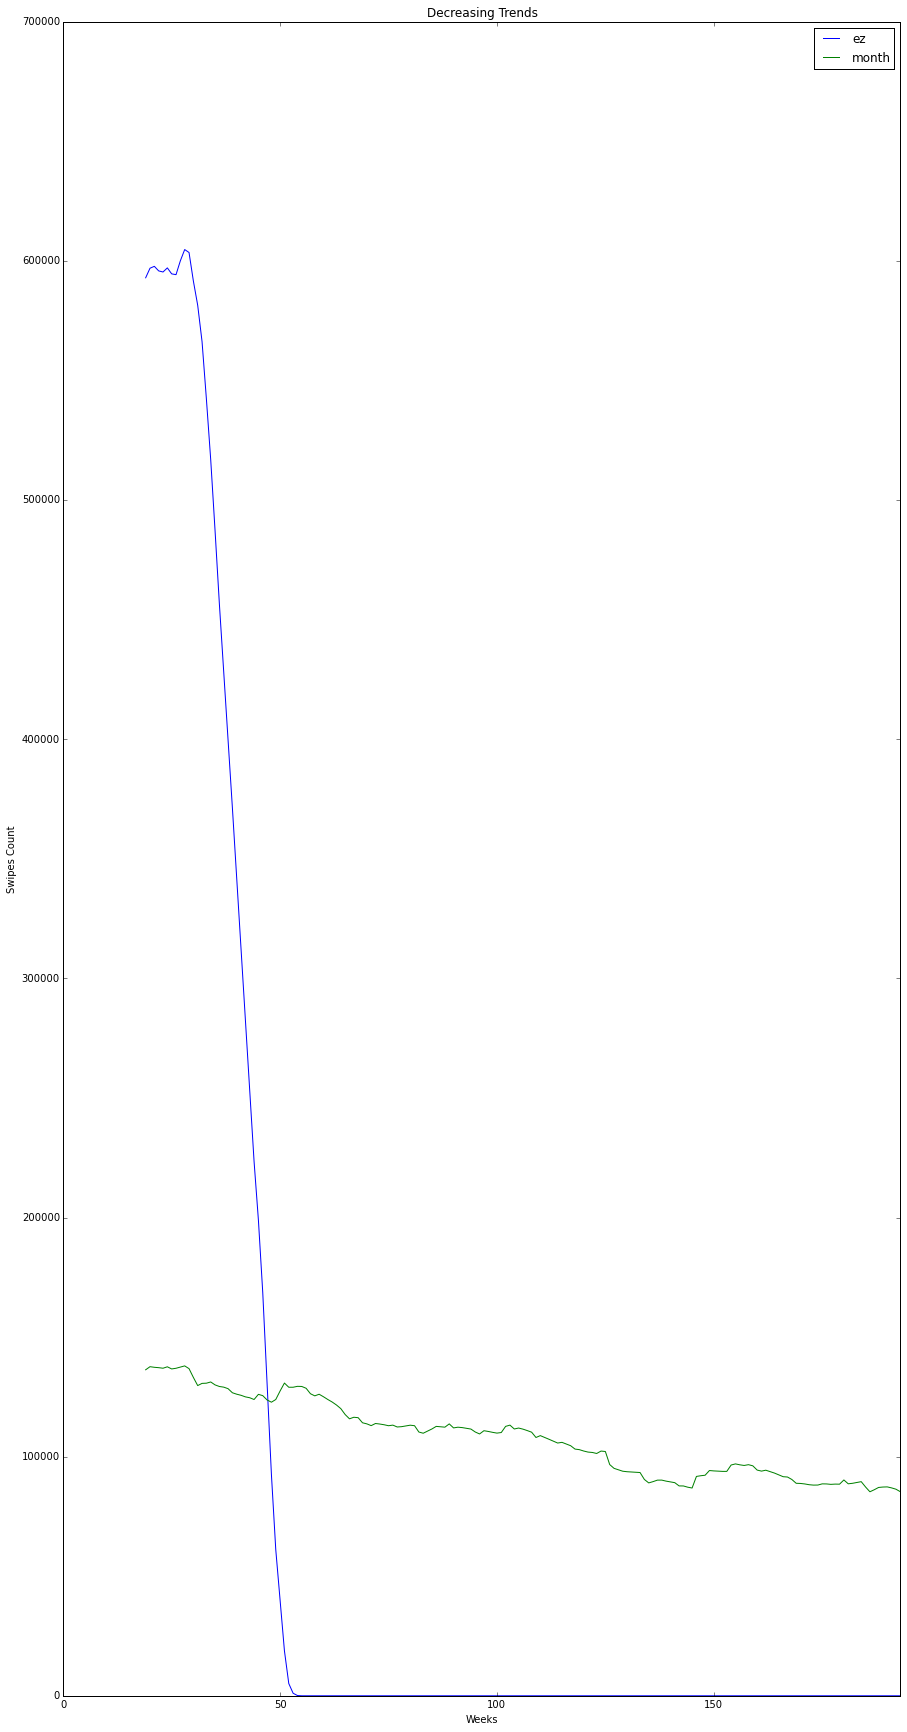

In [58]:
for i in ridetype:
    first10 = np.mean(rolling_mean[i][60:70])
    last10 = np.mean(rolling_mean[i][160:170])
    ratio = first10/last10
    if ratio>1.2:
        print ('decreasing')
        rolling_mean[i].plot(figsize=(15,30),label=i)
        pl.xlabel('Weeks')
        pl.ylabel('Swipes Count')
        pl.title('Decreasing Trends')
        pl.legend()
        print (i)
    

In [ ]:
x = pd.rolling_mean(pd.Series([1,12,14,15,20,95]),window = 2)

In [ ]:

dx = np.diff(x)
print dx
np.all(dx >= 0)

#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [51]:
sum_trips_stations = []
inter_sum = []
for i in range(600):
    inter_sum = []
    for j in range(194):
        inter_sum.append(np.nansum(data[i,:,j]))
    sum_trips_stations.append(inter_sum)    
    

In [7]:
#(sum_trips_stations[1])

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


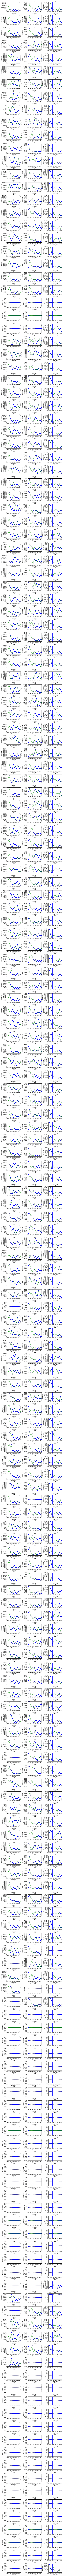

In [69]:
mta_stations = np.nansum(data, axis=1)
f = np.abs(np.fft.rfft(mta_stations))
f.shape

#Taking absolute real values of the fourier transform
ffreq = np.fft.rfftfreq(194, d=1.0)
ffreq.shape

fig = plt.figure(figsize=(10,400))
mtastats = pd.DataFrame(mta_stations)


for i in range(600):
    ax = fig.add_subplot(200,3,i)
    f = np.abs(np.fft.rfft(mtastats.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms = 8)
    ax.set_title("%i" %(i-1))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    plt.axvline(1.0/52)
    pl.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)
    pl.xlabel('Frequency')
    pl.ylabel('Amplitude')
    #Have to modify the loop below (ignore for now)
    
        

I saw it with eye and got 193,149,600 and 326 as the highest amplitude value with periodicity 